In [1]:
import pandas as pd
df_train=pd.read_csv('./data/train.csv')
df_train=df_train.dropna()
df_test=pd.read_csv('./data/test.csv')
df_test=df_test.dropna()
df_test.info()
df_value=pd.read_csv('./data/value.csv')
df_value=df_value.dropna()
df_value.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1114
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   文件名     1111 non-null   object 
 1   文章内容    1111 non-null   object 
 2   作文题目    1111 non-null   object 
 3   作文分数    1111 non-null   float64
dtypes: float64(1), object(3)
memory usage: 43.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1114
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   文件名     1112 non-null   object 
 1   文章内容    1112 non-null   object 
 2   作文题目    1112 non-null   object 
 3   作文分数    1112 non-null   float64
dtypes: float64(1), object(3)
memory usage: 43.4+ KB


In [2]:
df_train.shape
df_train.describe()

,作文分数
count,8901.000000
mean,69.269520
std,12.058586
min,0.000000
25%,60.000000
50%,70.000000
75%,75.000000
max,95.000000


In [3]:
print(df_train.groupby('作文题目').size())

作文题目
一封写给父母的信            556
一封求职信               477
口香糖与环境卫生              8
吸烟对个人健康和公众利益的影响    1078
如何看待“妻子回家”            8
如何看待“安乐死”           564
如何解决“代沟”问题          675
如何面对挫折              225
学习汉语的苦与乐            161
我学汉语是为了……            95
我对男女分班的看法           267
我对离婚问题的看法            57
我最喜欢读的一本书            36
我的一个假期              269
我的童年                160
我看流行歌曲              578
最理想的结交方式            188
父母是孩子的第一任老师         674
由“三个和尚没水喝”想到的……     766
绿色食品与饥饿            1226
记对我影响最大的一个人         570
记我的父亲                93
谈有效阅读                69
运动员收入                31
静音环境对人体的危害           70
dtype: int64


In [4]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"
labels = df_train['作文题目'].value_counts().index
values = df_train['作文题目'].value_counts().values

colors = df_train['作文题目']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors, line=dict(color='#000000', width=2)), 
                              title = "Distribution of sets of essay")])
fig.show()

In [5]:
import re,string
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '$', text)
    text = re.sub('\d+\D+\d+', '', text,count=1)
    text = text.replace('.','')
    text = text.replace('quot','') 
    text = text.replace('bb','')  
    return text
df_train['文章内容'] = df_train['文章内容'].apply(lambda x: clean_text(x))
df_test['文章内容'] = df_test['文章内容'].apply(lambda x: clean_text(x))
df_train.head()
df_train.to_csv('./data/clear.csv')

In [6]:
df_train.head()

,文件名,文章内容,作文题目,作文分数
0,qinglihou_200405204525200467.txt,吸烟对人的身体健康有不良影响，这是谁都知道的。日本的有些地方也有在公共场所吸烟时被罚款的地方...,吸烟对个人健康和公众利益的影响,55.0
1,qinglihou_200310540540150029.txt,$阅读我们从小学五六年级就已经开始教了，但那时老师们只教我们去读而没有教我们怎样去阅读及理解...,谈有效阅读,65.0
2,qinglihou_199605104525200301.txt,原来住在这座庙里的和尚，只有他一个人的时候全靠自己生活下来。后来，又来了一个和尚。那时候他知...,由“三个和尚没水喝”想到的……,65.0
3,qinglihou_200105109525100208.txt,这个短文有一点奇怪，因为这短文的后面说，大家都希望别人去山下抬水，他们不是和尚吗？还有他们没...,由“三个和尚没水喝”想到的……,60.0
4,qinglihou_200110540540250019.txt,我的童年生活是在战乱中度过的，没有现代儿童所拥有的那么幸福安宁；在我来说是如同神话里所描述的...,我的童年,85.0


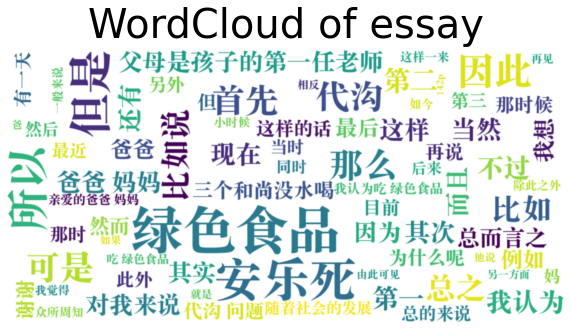

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       font_path = '/System/Library/Fonts/Supplemental/Songti.ttc',
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(df_train['文章内容']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay', fontsize = 40)
plt.axis("off")
plt.show()

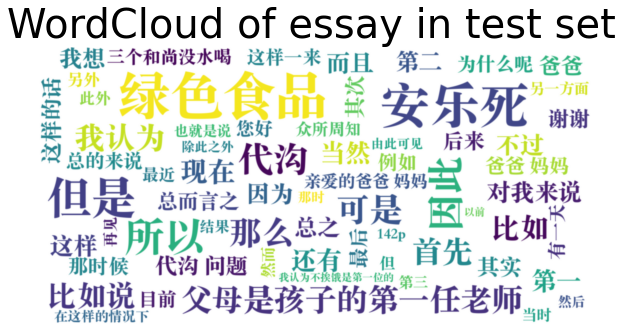

In [8]:
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       font_path = '/System/Library/Fonts/Supplemental/Songti.ttc',
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(df_test['文章内容']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay in test set', fontsize = 40)
plt.axis("off")
plt.show()

In [9]:
import nltk
print()
text = "I love you, don't you"

# instantiate tokenizer class
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print("Example Text: ", text)
print("Tokenization by whitespace: ", tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer: ", tokenizer2.tokenize(text))
print("Tokenization by punctuation: ", tokenizer3.tokenize(text))
print("Tokenization by regular expression: ", tokenizer4.tokenize(text))


Example Text:  I love you, don't you
Tokenization by whitespace:  ['I', 'love', 'you,', "don't", 'you']
Tokenization by words using Treebank Word Tokenizer:  ['I', 'love', 'you', ',', 'do', "n't", 'you']
Tokenization by punctuation:  ['I', 'love', 'you', ',', 'don', "'", 't', 'you']
Tokenization by regular expression:  ['I', 'love', 'you', 'don', 't', 'you']


In [10]:
import pkuseg
seg=pkuseg.pkuseg()
# Tokenizing the training set
df_train['文章内容'] = df_train['文章内容'].apply(lambda x: seg.cut(x))

# Tokenizing the test set
df_test['文章内容'] = df_test['文章内容'].apply(lambda x: seg.cut(x))

/Users/wangche/miniforge3/envs/wc1.4/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning:

urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!



In [11]:
print()
print('Tokenized String:')
df_train['文章内容'].head()
df_train.to_csv('./data/split.csv')



Tokenized String:


In [12]:
def combine_text(list_of_text):
    
    combined_text = ''.join(list_of_text)
    return combined_text
df_train['文章内容'] = df_train['文章内容'].apply(lambda x: combine_text(x))

df_train.head()

,文件名,文章内容,作文题目,作文分数
0,qinglihou_200405204525200467.txt,吸烟 对 人 的 身体 健康 有 不良 影响 ， 这是 谁 都 知道 的 。 日本 的 有些...,吸烟对个人健康和公众利益的影响,55.0
1,qinglihou_200310540540150029.txt,$ 阅读 我们 从 小学 五六 年级 就 已经 开始 教 了 ， 但 那时 老师们 只 教 ...,谈有效阅读,65.0
2,qinglihou_199605104525200301.txt,原来 住 在 这 座 庙 里 的 和尚 ， 只有 他 一个 人 的 时候 全 靠 自己 生活...,由“三个和尚没水喝”想到的……,65.0
3,qinglihou_200105109525100208.txt,这个 短文 有 一点 奇怪 ， 因为 这 短文 的 后面 说 ， 大家 都 希望 别人 去 ...,由“三个和尚没水喝”想到的……,60.0
4,qinglihou_200110540540250019.txt,我 的 童年 生活 是 在 战乱 中 度过 的 ， 没有 现代 儿童 所 拥有 的 那么 幸...,我的童年,85.0
